In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-income-dataset/adult.csv


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Quesiton to check
The income data collect the people's income and their corresponding information including age, gender, education, occupation, marriage, working hours etc. It is very intesting to check the relation ship between the income the these features. It would be great to find the key feautures that could explain the income difference.

**# Load data and explore the data**

In [3]:
input = pd.read_csv("/kaggle/input/adult-income-dataset/adult.csv")

In [6]:
input.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
input.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
input.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


6 features are numetric. 9 features are category.

In [9]:
input.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
input.max()

age                              90
workclass               Without-pay
fnlwgt                      1490400
education              Some-college
educational-num                  16
marital-status              Widowed
occupation         Transport-moving
relationship                   Wife
race                          White
gender                         Male
capital-gain                  99999
capital-loss                   4356
hours-per-week                   99
native-country           Yugoslavia
income                         >50K
dtype: object

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

[Text(0.5, 0, 'hours-per-week')]

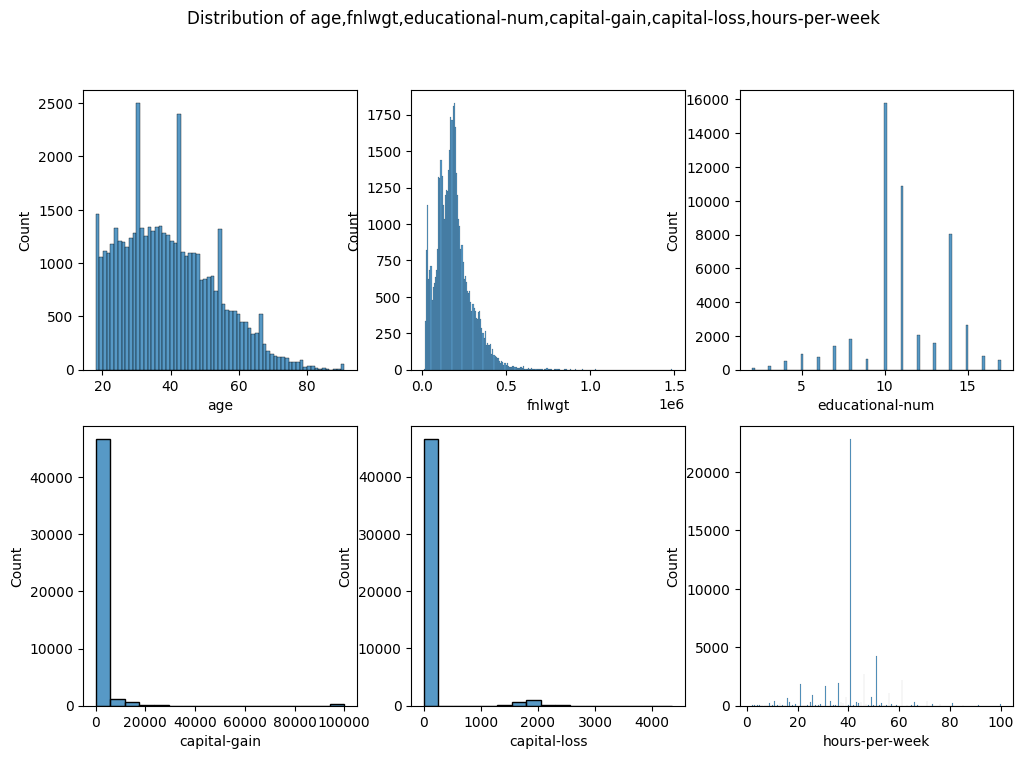

In [11]:
fig,axes = plt.subplots(2,3,figsize=(12,8))
fig.suptitle('Distribution of age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week')
sns.histplot(ax=axes[0,0],data=input['age']+1,log_scale=False)
axes[0,0].set(xlabel='age')
sns.histplot(ax=axes[0,1],data=input['fnlwgt']+1,log_scale=False)
axes[0,1].set(xlabel='fnlwgt')
sns.histplot(ax=axes[0,2],data=input['educational-num']+1,log_scale=False)
axes[0,2].set(xlabel='educational-num')
sns.histplot(ax=axes[1,0],data=input['capital-gain']+1,log_scale=False)
axes[1,0].set(xlabel='capital-gain')
sns.histplot(ax=axes[1,1],data=input['capital-loss']+1,log_scale=False)
axes[1,1].set(xlabel='capital-loss')
sns.histplot(ax=axes[1,2],data=input['hours-per-week']+1,log_scale=False)
axes[1,2].set(xlabel='hours-per-week')


1. educational-num and hours per week are close to symetric. Most people have 10 years educatoin, while most people have work 40 hours a week
2. Most people don't have capital gain or loss
3. age and fnlwgt are not symetic distributed. 

In [12]:
len(input.columns[input.dtypes=='object'])

9

In [18]:
obj_col = input.columns[input.dtypes=='object'] # collect categorical features

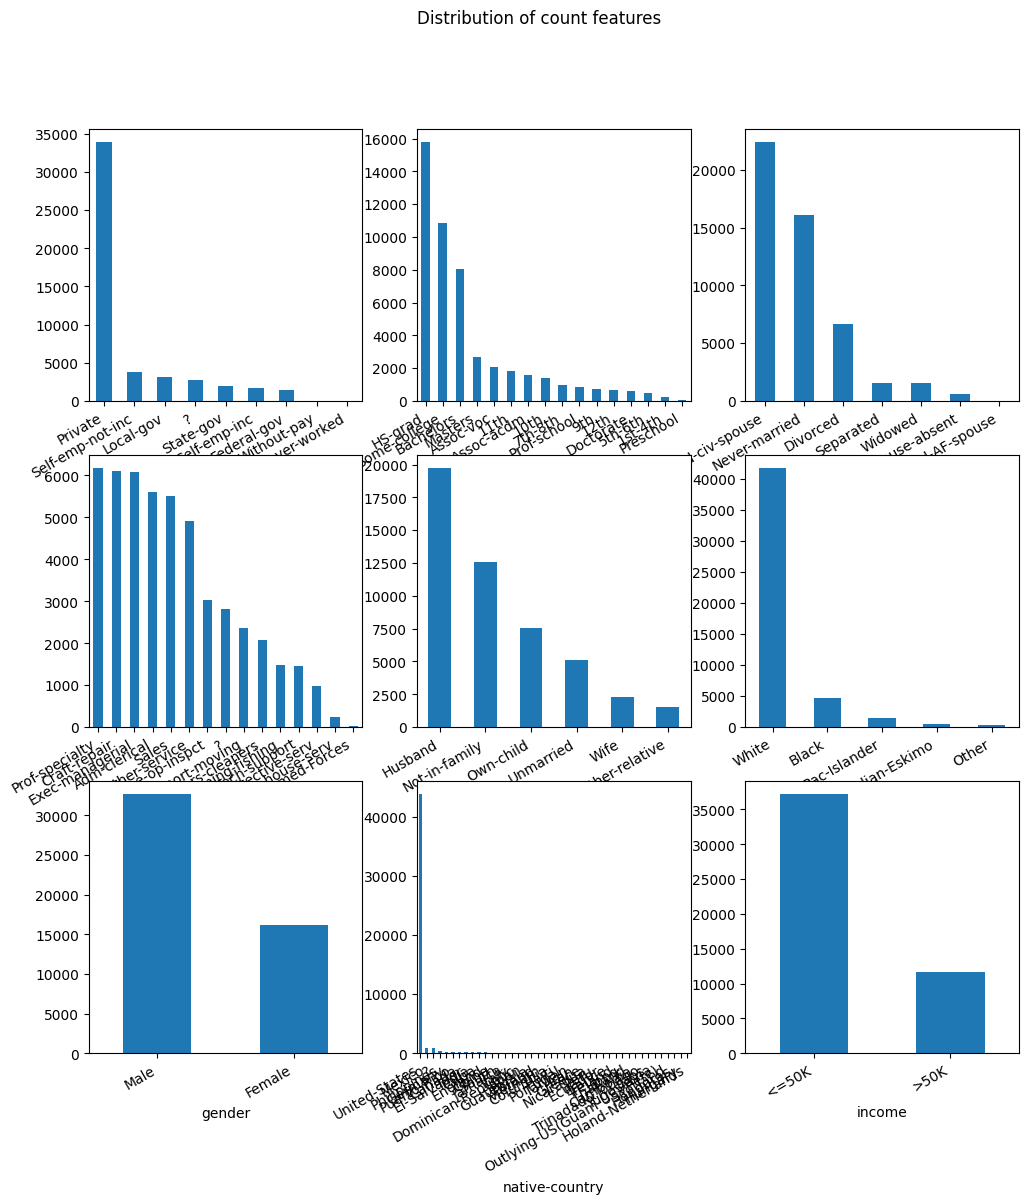

In [13]:
fig,axes = plt.subplots(3,3,figsize=(12,12))
fig.suptitle('Distribution of count features')
for i in range(3):
    for j in range(3):
        input[obj_col[i*3+j]].value_counts().plot(kind='bar',ax=axes[i,j])
        axes[i,j].set(xlabel = obj_col[i*3+j])
        axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), rotation=30, ha='right')

1. There are more male data than female. Most of samples are from Untied states.
2. Number of people with income less than 50k is much higher comparing to the ones with income higher than 50k
3. Most of samples are from white people.
4. Most samples are from United states which make the nationality feature seems not useful. 

In [13]:
int_col = input.columns[input.dtypes=='int'].tolist() # collect numrical features

In [14]:
int_col.append('income')

In [15]:
int_col

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

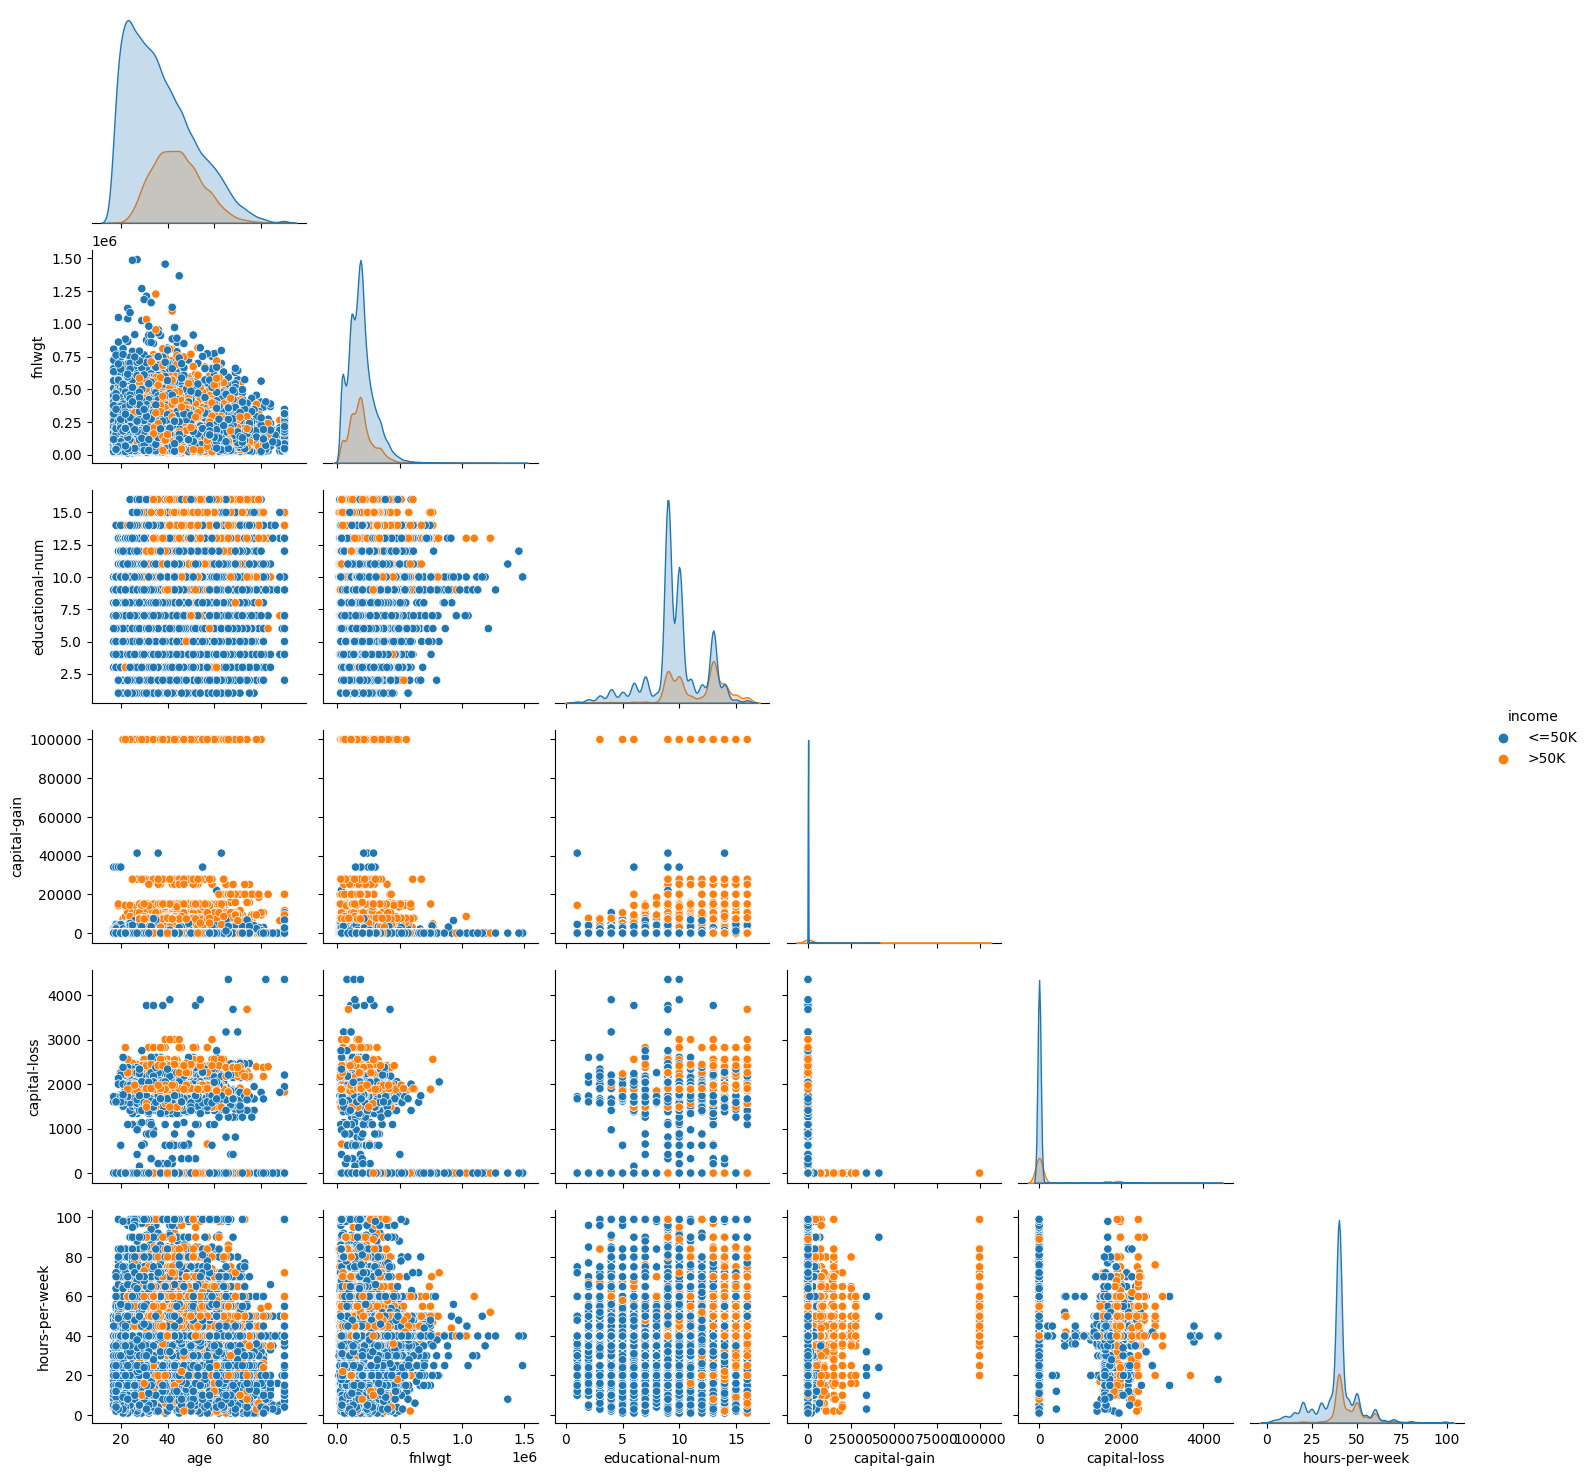

In [16]:
sns.pairplot(input[int_col],hue = 'income',corner=True)

1. People with salary >= 50k have higher age comparing to these with salary less than 50k
2. People with salary >= 50k have higher educational-num comparing to people with salary less than 50k
3. People with salary >= 50k have higher capital gain
4. Capital loss is not differentiable.
5. People with salary >= 50k have longer weekly work time.
6. The correlation between features are hard to oberserve


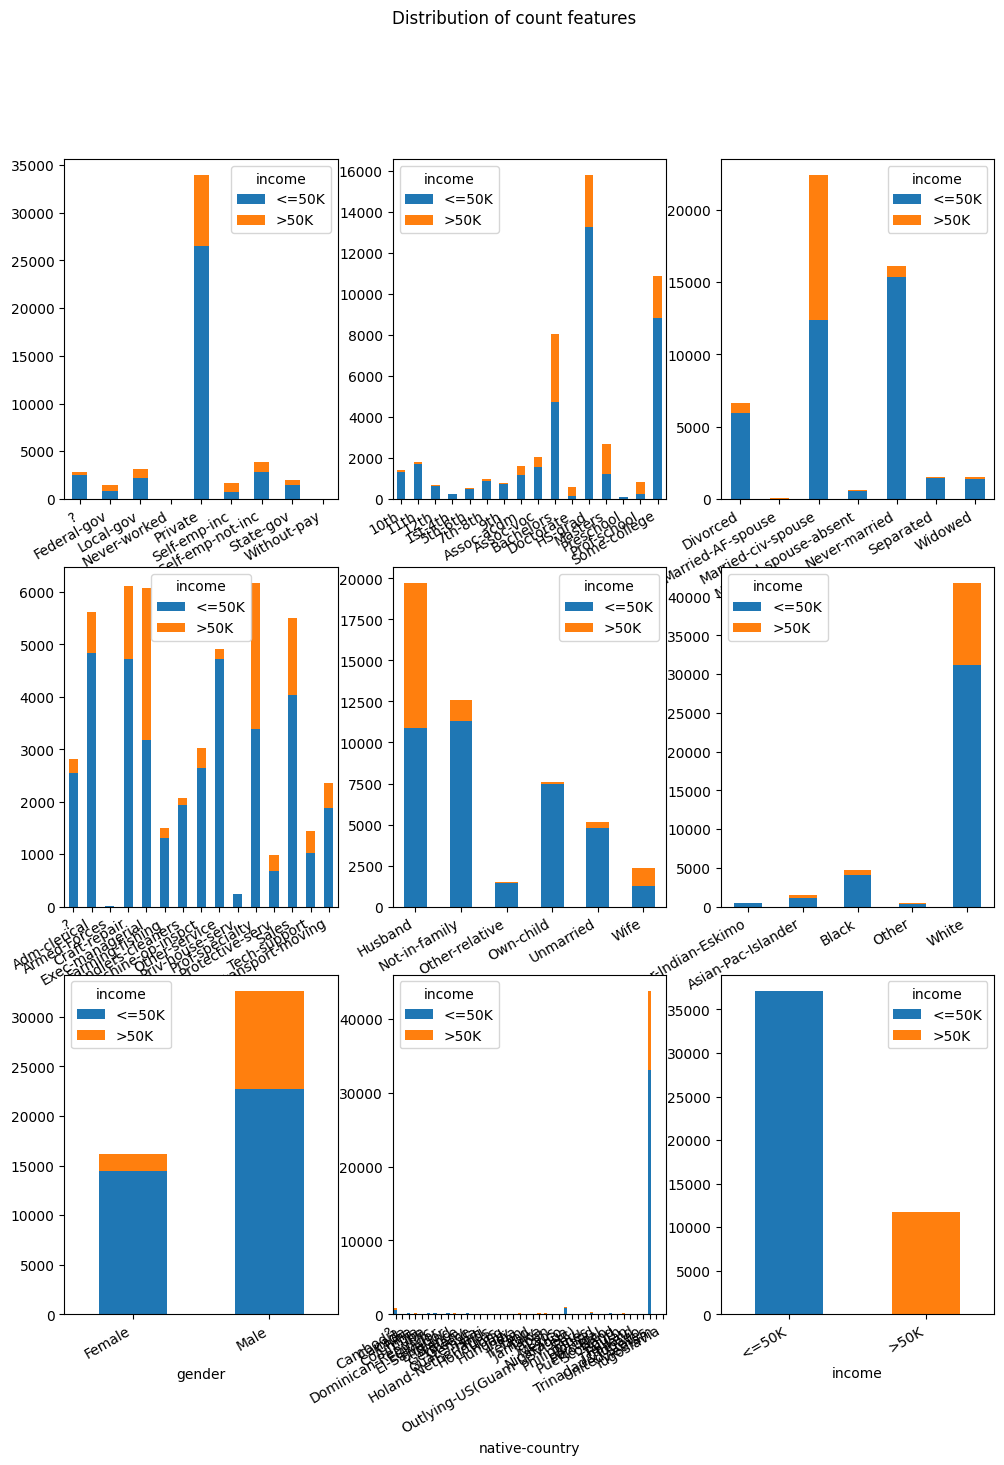

In [19]:
fig,axes = plt.subplots(3,3,figsize=(12,15))
fig.suptitle('Distribution of count features')
for i in range(3):
    for j in range(3):
        pd.crosstab(input[obj_col[i*3+j]],input.income).plot(kind='bar',stacked=True,ax=axes[i,j])
        axes[i,j].set(xlabel = obj_col[i*3+j])
        axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), rotation=30, ha='right')

1. Private has the highest rate of >50k income
2. Education is important for income. Doctor has highest fraction of >50k income, Master is the second, bachelor the thrid, the HS-grad is lower. 
3. Married people tend to have higher income
4. Prof-specialty and farming-fishing have better income comparing to other job categories.
5. Husband and wife have higher income comparing to other unmarried people.
6. white people have higher income.
7. Male poeple have higher income comparing to female.

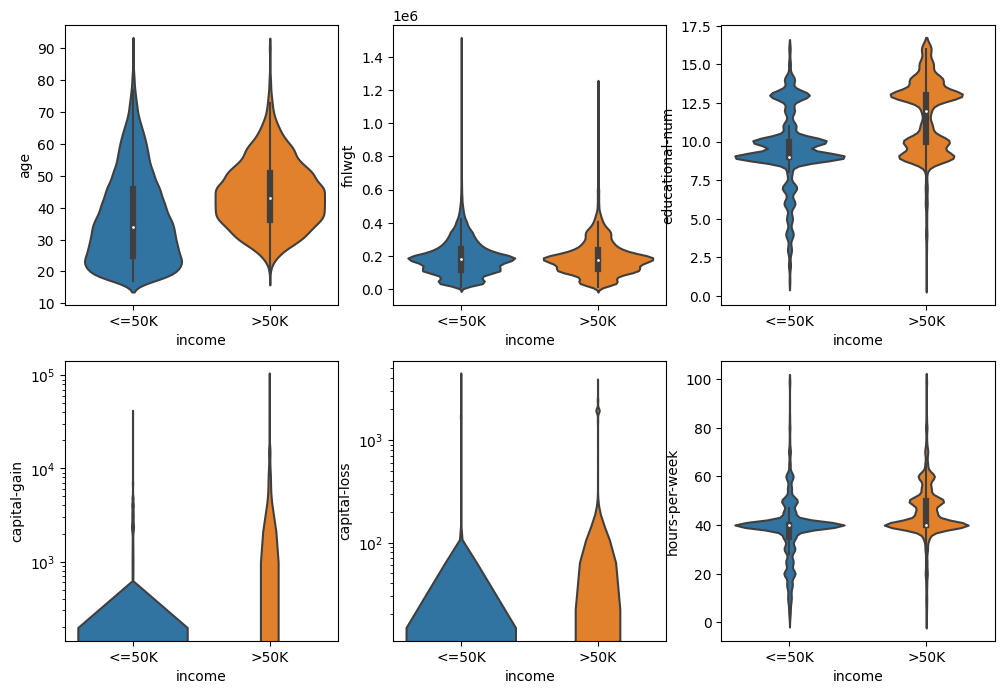

In [49]:
fig,axes = plt.subplots(2,3,figsize=(12,8))
for i in range(2):
    for j in range(3):
        if int_col[3*i+j] == 'capital-gain':
            sns.violinplot(y=int_col[i*3+j],x='income',data=input,ax=axes[i,j])
            axes[i,j].set_yscale("log")
        elif int_col[3*i+j] == 'capital-loss':
            sns.violinplot(y=int_col[i*3+j],x='income',data=input,ax=axes[i,j])
            axes[i,j].set_yscale("log")
        else:
            sns.violinplot(y=int_col[i*3+j],x='income',data=input,ax=axes[i,j])

Violinplot reconfirm the observations on numeric features and income.